In [63]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [64]:
class AgentState(TypedDict):
    number1 : int
    operation1: str
    number2 : int
    final1 : int 

    number3 : int
    operation2: str
    number4 : int
    final2 : int

In [65]:
def add_node1(state : AgentState) -> AgentState:
    state['final1'] = state['number1'] + state['number2']
    return state    

def subtract_node1(state : AgentState) -> AgentState:
    state['final1'] = state['number1'] - state['number2']
    return state  
  
def add_node2(state : AgentState) -> AgentState:
    state['final2'] = state['number3'] + state['number4']
    return state 
   
def subtract_node2(state : AgentState) -> AgentState:
    state['final2'] = state['number3'] - state['number4']
    return state

def router(state : AgentState) -> str:

    if state['operation1'] == '+':
        return "addition_operation"  
      
    elif state['operation1'] == '-':
        return "subtraction_operation" 
       
       

def router2(state : AgentState) -> str:
    
    if state['operation2'] == '+':
        return "addition_operation2" 
       
    elif state['operation2'] == '-':
        return "subtraction_operation2"  

In [66]:
graph = StateGraph(AgentState)

graph.add_node('add_node1', add_node1)
graph.add_node('subtract_node1', subtract_node1)
graph.add_node('add_node2', add_node2)
graph.add_node('subtract_node2', subtract_node2)
graph.add_node('router', lambda state : state)
graph.add_node('router2', lambda state : state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    'router',
    router,
    {
        "addition_operation" : "add_node1",
        "subtraction_operation" : "subtract_node1",
    }

)

graph.add_conditional_edges(
    'router2',
    router2,
    {
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2",
    }
)

graph.add_edge('add_node1', 'router2')
graph.add_edge('subtract_node1', 'router2')
graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)

app = graph.compile()


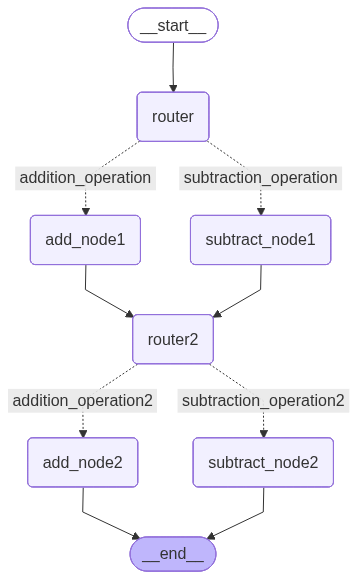

In [67]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [68]:
result = app.invoke({
    'number1' : 10,
    'operation1' : '+',
    'number2' : 20,
    'number3' : 30,
    'operation2' : '-',
    'number4' : 40,
})

print(result['final2'])
print(result['final1'])

-10
30
